# Regresión logística

In [ ]:
from google.colab import files
 
uploaded = files.upload()

Saving games.csv to games.csv


## Importación de datos

In [ ]:
import pandas as pd
 
data = pd.read_csv('games.csv')
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
# Información de la db

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

**Limpieza de datos**

In [ ]:
print(data['gameId'].count())

9879


In [ ]:
df = data[data['blueWardsPlaced'] <= 100 ]
df = df[df['blueTotalMinionsKilled'] > 90 ]

In [ ]:
print(df['gameId'].count())

9770


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


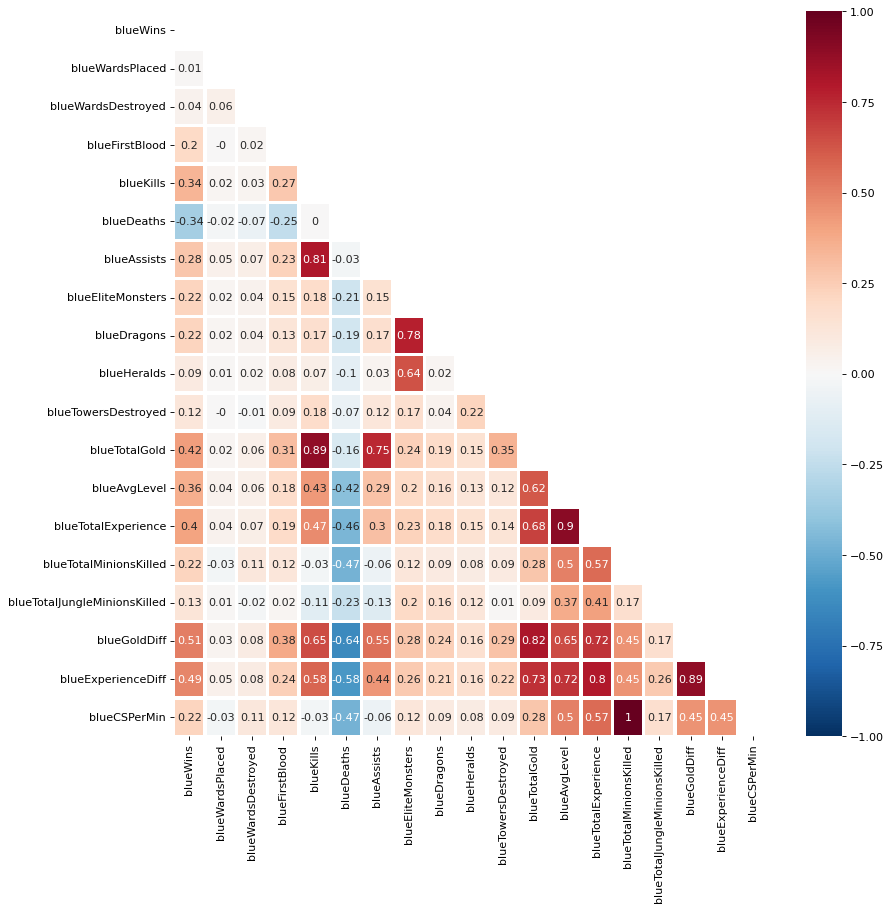

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

corr = df.iloc[:, 1:20].corr()
corr = np.round(corr, decimals=2)


figure(figsize=(12, 12), dpi=80)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap = sn.heatmap(corr, mask = mask, vmin = -1, vmax = 1, cmap = "RdBu_r", linewidths=2, annot=True)
plt.show()

**Definir features (inputs) y la variable target (crítica/label)**

In [ ]:
features = ['blueTowersDestroyed', 'blueTotalMinionsKilled', 'blueKills']
X = df[features]
Y = df['blueWins']

In [ ]:
print(X)

      blueTowersDestroyed  blueTotalMinionsKilled  blueKills
0                       0                     195          9
1                       0                     174          5
2                       0                     186          7
3                       0                     201          4
4                       0                     210          6
...                   ...                     ...        ...
9874                    0                     211          7
9875                    0                     233          6
9876                    0                     210          6
9877                    0                     224          2
9878                    0                     207          6

[9770 rows x 3 columns]


In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
9874    1
9875    1
9876    0
9877    0
9878    1
Name: blueWins, Length: 9770, dtype: int64


## Creación de modelo y pruebas

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
import numpy as np

### Primer modelo

In [ ]:
# Sets de 20% testeo y 80% entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [ ]:
# Ajustar el modelo
logistic_regressor = LogisticRegression();
logistic_regressor.fit(x_train, y_train);

# Realizar predicciones con set de entrenamiento
y_pred = logistic_regressor.predict(x_test)

# Hacer pruebas y validaciones
score1 = logistic_regressor.score(x_test, y_test)
print('\nAcurracy: ', score1, '\n')

print(classification_report(y_test,y_pred))
print('Mean Absolute Error:', 
      round(metrics.mean_absolute_error(y_test, y_pred), 5))
print('Mean Squared Error:', 
      round(metrics.mean_squared_error(y_test, y_pred), 5))
print('Root Mean Squared Error:', 
      round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 5))



Acurracy:  0.6862845445240532 

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       982
           1       0.69      0.67      0.68       972

    accuracy                           0.69      1954
   macro avg       0.69      0.69      0.69      1954
weighted avg       0.69      0.69      0.69      1954

Mean Absolute Error: 0.31372
Mean Squared Error: 0.31372
Root Mean Squared Error: 0.5601


### Segundo modelo

In [ ]:
# Sets de 1/3 testeo y 2/3 entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=4)

In [ ]:
# Ajustar el modelo
logistic_regressor = LogisticRegression();
logistic_regressor.fit(x_train, y_train);

# Realizar predicciones con set de entrenamiento
y_pred = logistic_regressor.predict(x_test)

# Hacer pruebas y validaciones
score2 = logistic_regressor.score(x_test, y_test)
print('\nAcurracy: ', score2, '\n')

print(classification_report(y_test,y_pred))
print('Mean Absolute Error:', 
      round(metrics.mean_absolute_error(y_test, y_pred), 5))
print('Mean Squared Error:', 
      round(metrics.mean_squared_error(y_test, y_pred), 5))
print('Root Mean Squared Error:', 
      round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 5))



Acurracy:  0.6796899224806201 

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1649
           1       0.67      0.67      0.67      1576

    accuracy                           0.68      3225
   macro avg       0.68      0.68      0.68      3225
weighted avg       0.68      0.68      0.68      3225

Mean Absolute Error: 0.32031
Mean Squared Error: 0.32031
Root Mean Squared Error: 0.56596


## Confusion matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Primer modelo

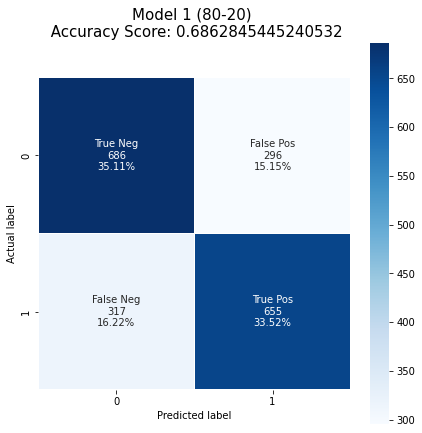

In [ ]:
# ---- Modelo 1 ----
cm1 = metrics.confusion_matrix(y_test, y_pred)

# Crear grupos de strings para mostrar nombre de etiqueta, conteo y porcentaje
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm1.flatten()/np.sum(cm1)]

# Formateo y agrupación de etiquetas
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creación de gráfico 
plt.figure(figsize=(7,7))
sns.heatmap(cm1, annot=labels, fmt='', linewidths=.5, 
            square = True, cmap = 'Blues')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Model 1 (80-20) \n Accuracy Score: {0}\n\n'.format(score1)
plt.title(all_sample_title, size = 15);

### Segundo modelo

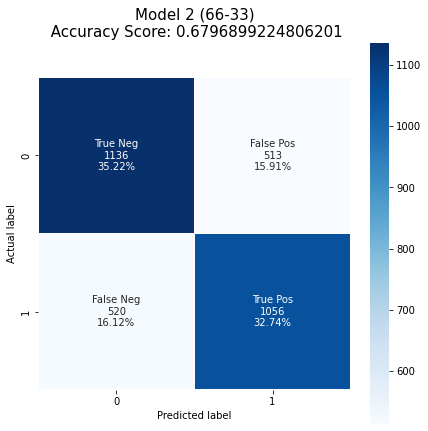

In [ ]:
# ---- Modelo 2  ----
cm2 = metrics.confusion_matrix(y_test, y_pred)

# Crear grupos de strings para mostrar nombre de etiqueta, conteo y porcentaje
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm2.flatten()/np.sum(cm2)]

# Formateo y agrupación de etiquetas
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Creación de gráfico 
plt.figure(figsize=(7,7))
sns.heatmap(cm2, annot=labels, fmt='', linewidths=.5, 
            square = True, cmap = 'Blues')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Model 2 (66-33)\n Accuracy Score: {0}\n\n'.format(score2)
plt.title(all_sample_title, size = 15);